In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [114]:
# 1. Leer el CSV
df = pd.read_csv('../data/student_depression_dataset.csv')

# 2. Tomar 0.5% aleatorio (más manejable para este dataset grande)
df_sample

# 3. Ver información
print(f"Dataset completo: {df.shape[0]} filas")
print(f"\nColumnas: {df.columns.tolist()}")


Dataset completo: 27901 filas

Columnas: ['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Work/Study Hours', 'Financial Stress', 'Family History of Mental Illness', 'Depression']


In [115]:
# 3. Identificar columnas numéricas para análisis de outliers
numeric_cols = df_sample.select_dtypes(include=[np.number]).columns.tolist()

print(f"\nColumnas numéricas detectadas ({len(numeric_cols)}):")
for col in numeric_cols:
    print(f"  - {col}")





Columnas numéricas detectadas (9):
  - id
  - Age
  - Academic Pressure
  - Work Pressure
  - CGPA
  - Study Satisfaction
  - Job Satisfaction
  - Work/Study Hours
  - Depression


In [117]:

# 3. Identificar columnas numéricas para análisis de outliers
numeric_cols = df_sample.select_dtypes(include=[np.number]).columns.tolist()

print(f"\nColumnas numéricas detectadas ({len(numeric_cols)}):")
for col in numeric_cols:
    print(f"  - {col}")

# 4. Función para calcular outliers con IQR
def detectar_outliers_iqr(data, columna):
    """
    Detecta outliers usando el método IQR (Interquartile Range)
    
    Parámetros:
    - data: DataFrame
    - columna: nombre de la columna a analizar
    
    Retorna:
    - dict con Q1, Q3, IQR, límites y outliers
    """
    Q1 = data[columna].quantile(0.25)
    Q3 = data[columna].quantile(0.75)
    IQR = Q3 - Q1
    
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    # Detectar outliers
    outliers = data[(data[columna] < limite_inferior) | (data[columna] > limite_superior)]
    
    return {
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'limite_inferior': limite_inferior,
        'limite_superior': limite_superior,
        'n_outliers': len(outliers),
        'porcentaje_outliers': (len(outliers) / len(data)) * 100,
        'outliers_indices': outliers.index.tolist()
    }

# 5. Analizar outliers en todas las columnas numéricas
print("\n" + "="*80)
print("ANÁLISIS DE OUTLIERS - MÉTODO IQR")
print("="*80)

resultados_outliers = {}

for col in numeric_cols:
    resultado = detectar_outliers_iqr(df_sample, col)
    resultados_outliers[col] = resultado
    
    print(f"\n📊 {col}:")
    print(f"   Q1 (25%): {resultado['Q1']:.2f}")
    print(f"   Q3 (75%): {resultado['Q3']:.2f}")
    print(f"   IQR: {resultado['IQR']:.2f}")
    print(f"   Límite inferior: {resultado['limite_inferior']:.2f}")
    print(f"   Límite superior: {resultado['limite_superior']:.2f}")
    print(f"   Outliers encontrados: {resultado['n_outliers']} ({resultado['porcentaje_outliers']:.2f}%)")




Columnas numéricas detectadas (9):
  - id
  - Age
  - Academic Pressure
  - Work Pressure
  - CGPA
  - Study Satisfaction
  - Job Satisfaction
  - Work/Study Hours
  - Depression

ANÁLISIS DE OUTLIERS - MÉTODO IQR

📊 id:
   Q1 (25%): 35039.00
   Q3 (75%): 105818.00
   IQR: 70779.00
   Límite inferior: -71129.50
   Límite superior: 211986.50
   Outliers encontrados: 0 (0.00%)

📊 Age:
   Q1 (25%): 21.00
   Q3 (75%): 30.00
   IQR: 9.00
   Límite inferior: 7.50
   Límite superior: 43.50
   Outliers encontrados: 12 (0.04%)

📊 Academic Pressure:
   Q1 (25%): 2.00
   Q3 (75%): 4.00
   IQR: 2.00
   Límite inferior: -1.00
   Límite superior: 7.00
   Outliers encontrados: 0 (0.00%)

📊 Work Pressure:
   Q1 (25%): 0.00
   Q3 (75%): 0.00
   IQR: 0.00
   Límite inferior: 0.00
   Límite superior: 0.00
   Outliers encontrados: 3 (0.01%)

📊 CGPA:
   Q1 (25%): 6.29
   Q3 (75%): 8.92
   IQR: 2.63
   Límite inferior: 2.35
   Límite superior: 12.87
   Outliers encontrados: 9 (0.03%)

📊 Study Satisfaction:

In [110]:
# 5. Analizar outliers solo en la columna 'Age'
print("\n" + "="*80)
print("ANÁLISIS DE OUTLIERS - MÉTODO IQR (Columna: Age)")
print("="*80)

# Analizar solo Age
col = 'Age'
resultado = detectar_outliers_iqr(df_sample, col)

print(f"\n📊 {col}:")
print(f"   Q1 (25%): {resultado['Q1']:.2f}")
print(f"   Q3 (75%): {resultado['Q3']:.2f}")
print(f"   IQR: {resultado['IQR']:.2f}")
print(f"   Límite inferior: {resultado['limite_inferior']:.2f}")
print(f"   Límite superior: {resultado['limite_superior']:.2f}")
print(f"   Outliers encontrados: {resultado['n_outliers']} ({resultado['porcentaje_outliers']:.2f}%)")

# Mostrar los registros que son outliers
if resultado['n_outliers'] > 0:
    print(f"\n🔍 Registros con outliers en Age:")
    outliers_df = df_sample[df_sample.index.isin(resultado['outliers_indices'])]
    print(outliers_df[['id', 'Age', 'Gender', 'City', 'Academic Pressure', 'CGPA', 'Depression']])
else:
    print(f"\n✅ No se encontraron outliers en Age")



ANÁLISIS DE OUTLIERS - MÉTODO IQR (Columna: Age)

📊 Age:
   Q1 (25%): 21.00
   Q3 (75%): 30.00
   IQR: 9.00
   Límite inferior: 7.50
   Límite superior: 43.50
   Outliers encontrados: 12 (0.04%)

🔍 Registros con outliers en Age:
           id   Age  Gender       City  Academic Pressure  CGPA  Depression
13499   68441  54.0    Male       Agra                5.0  9.60           0
5537    27918  44.0  Female   Srinagar                1.0  6.83           0
25202  126970  48.0  Female     Rajkot                3.0  5.32           1
27334  137827  48.0  Female      Surat                1.0  8.92           0
3436    17213  49.0    Male     Nagpur                3.0  6.47           0
4386    22004  51.0  Female     Bhopal                2.0  8.26           0
13618   69032  48.0  Female  Ghaziabad                3.0  7.48           0
18766   94978  46.0  Female    Lucknow                3.0  6.83           1
9006    45393  46.0    Male     Nashik                1.0  6.10           0
2909    14

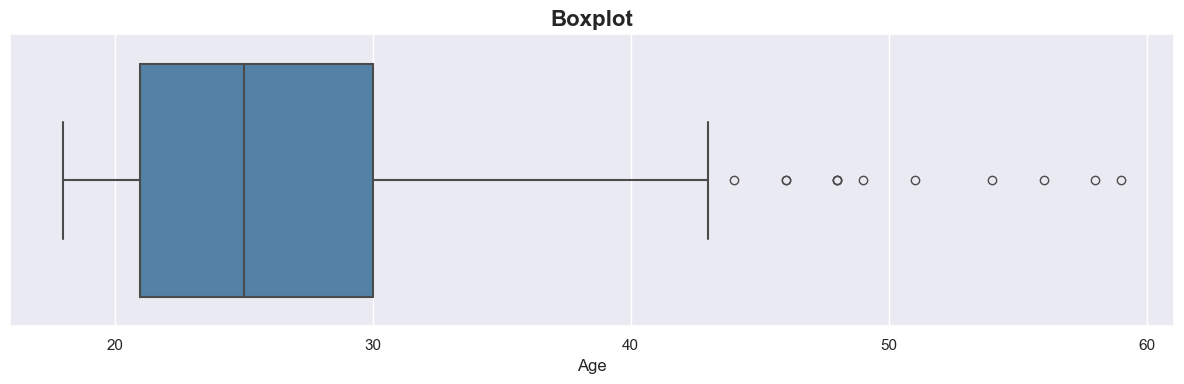

In [75]:
# 7. Visualización estilo horizontal - Boxplot de Age

# Configurar estilo seaborn
sns.set(style="darkgrid")

# Crear figura
plt.figure(figsize=(12, 4))

# Crear boxplot HORIZONTAL con seaborn
sns.boxplot(data=df_sample, x='Age', orient='h', color='steelblue', linewidth=1.5)

# Personalizar
plt.title('Boxplot', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('')

# Ajustar layout
plt.tight_layout()
plt.show()


In [84]:
# 8. Función para crear boxplot + histograma (CON ESCALA DE 5 EN 5)
def plot_boxplot_and_hist(data, variable):
    """
    Crea un diagrama de caja junto a un histograma para visualizar la distribución
    
    Parámetros:
    - data: DataFrame
    - variable: nombre de la columna a visualizar
    """
    # Configurar estilo seaborn
    sns.set(style="darkgrid")
    
    # Crear figura con subplots (2 gráficos: boxplot arriba + histograma abajo)
    f, (ax_box, ax_hist) = plt.subplots(
        2, 
        sharex=True,
        figsize=(12, 8),
        gridspec_kw={"height_ratios": (0.30, 0.70)}
    )
    
    # Boxplot HORIZONTAL (arriba) - CON OUTLIERS VISIBLES
    sns.boxplot(
        x=data[variable], 
        ax=ax_box, 
        color='steelblue', 
        linewidth=1.5,
        fliersize=8,  # Tamaño de los outliers
        flierprops=dict(marker='o', markerfacecolor='red', markersize=8, 
                       linestyle='none', markeredgecolor='darkred', alpha=0.7)  # Estilo de outliers
    )
    ax_box.set(xlabel='')
    ax_box.set_title('Boxplot', fontsize=14, fontweight='bold')
    ax_box.grid(True, alpha=0.3)
    
    # Calcular bins de 5 en 5
    min_val = data[variable].min()
    max_val = data[variable].max()
    bins = np.arange(int(min_val // 5) * 5, int(max_val // 5 + 1) * 5 + 5, 5)
    
    # Histograma (abajo) - CON BINS DE 5 EN 5
    sns.histplot(
        data=data, 
        x=variable, 
        ax=ax_hist, 
        bins=bins,  # Bins de 5 en 5
        color='steelblue', 
        kde=False,
        edgecolor='white',
        linewidth=0.5
    )
    
    ax_hist.set_title(variable, fontsize=14, fontweight='bold')
    ax_hist.set_xlabel(variable, fontsize=12)
    ax_hist.set_ylabel('Count', fontsize=12)
    ax_hist.grid(True, alpha=0.3)
    
    # Configurar xticks cada 5 unidades
    ax_hist.set_xticks(bins)
    ax_box.set_xticks(bins)
    
    plt.tight_layout()
    plt.show()


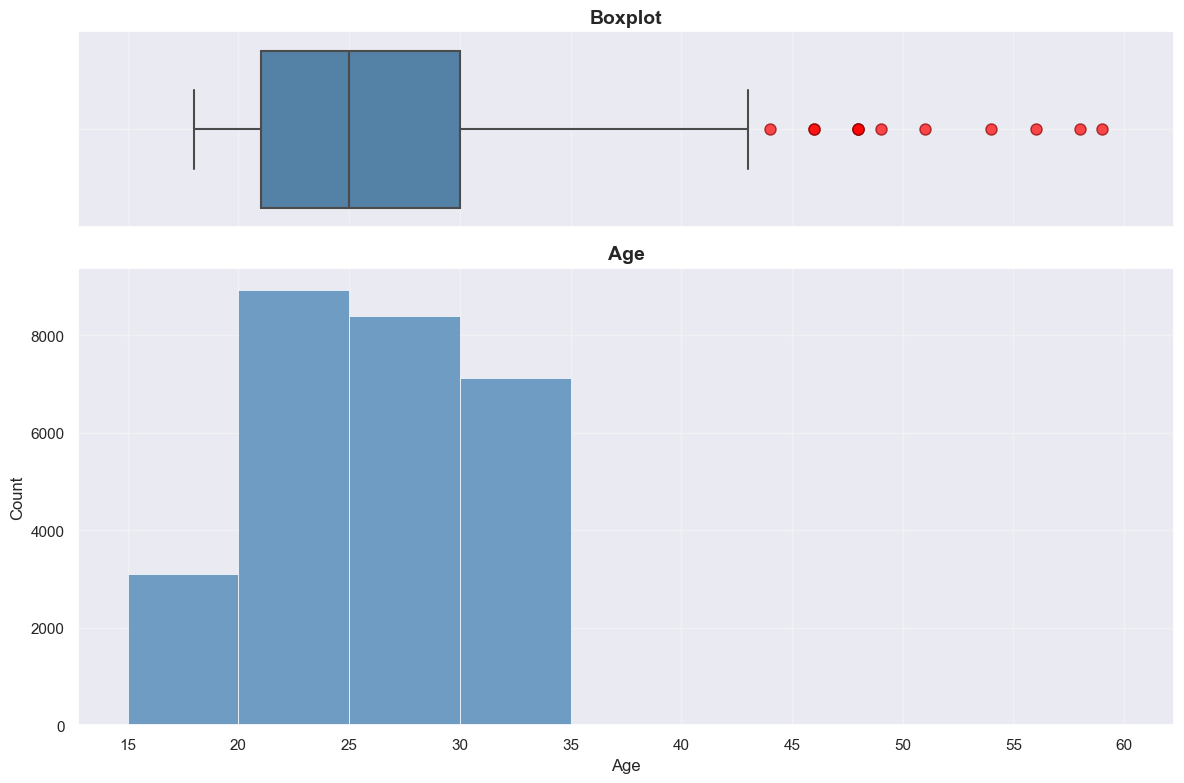

In [85]:
plot_boxplot_and_hist(df_sample, "Age")
